# 넷플릭스 데이터 시각화

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 라이브러리 임포트

In [2]:
!pip install plotly

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from datetime import datetime

In [5]:
# 캐글 넷플릭스 데이터
path = '/content/drive/MyDrive/아이펠/해커톤 1/넷플릭스/'
path_1 = path + 'netflix_titles.csv'
netflix = pd.read_csv(path_1)

In [6]:
# 다른 데이터들 불러오기
# 넷플릭스 오리지널
path_2 = path + 'NetflixOriginals.csv'
netflix_original = pd.read_csv(path_2, encoding='latin1')

#넷플릭스 오리지널 두번째 데이터셋
path_3= path + 'Netflix Original Content Dataset.csv'
netflix_original_2 = pd.read_csv(path_3, encoding='latin1')

# 넷플릭스 구독료
path_4 = path + 'Netflix subscription fee Dec-2021.csv'
netflix_cost = pd.read_csv(path_4, encoding='latin1')

# 넷플릭스 주가
path_5 = path + 'NFLX_stock_2002to2021.csv'
netflix_stock = pd.read_csv(path_5, index_col='Date', parse_dates=True, encoding='latin1')

# 디즈니플러스 데이터
path_6 = path + 'disney_plus_titles.csv'
disney = pd.read_csv(path_6)

# 디즈니플러스 주가
path_7 = path + 'DIS_stock_2019to2022.csv'
disney_stock = pd.read_csv(path_7, index_col='Date', parse_dates=True, encoding='latin1')

# 데이터 불러오기

**Data Description**

- `show_id` - Unique ID for every Movie/TV Show.
- `type` - Type of Content: Movie/TV Show.
- `title` - Name of the Movie/TV Show.
- `director` - Name of the Director of the Movie/TV Show.
- `cast` - Actors involved in the Movie/TV Show.
- `country` - Name of the Countries where the Movie/TV Show is produced.
- `date_added` - The Date in which the Movie/TV Show was added on Netflix.
- `release_year` - Original Release Year of the Movie/TV Show.
- `rating` - Rating of the Movie/TV Show.
- `duration` - Total Duration of the Movie (in Minutes) or TV Show (in Seasons).
- `listed_in` - Genre of the Movie/TV Show.
- `description` - Summary of the Movie/TV Show.

In [7]:
path = '/content/drive/MyDrive/아이펠/해커톤 1/넷플릭스/'
# path = os.getenv('HOME')+ '/aiffel/넷플릭스/'
path_1 = path + 'netflix_titles.csv'
netflix = pd.read_csv(path_1)

netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [8]:
# Checking Shape of Dataset
netflix.shape

(8807, 12)

In [9]:
# How many columns are present in the Dataset?
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Informations about the Dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- `director`, `cast`, `country`, `date_add`, `rating`, `duration` 컬럼에서 결측치가 있음
- 특히 `director`, `cast`, `country`에서 결측치가 많아 보임

In [11]:
# 데이터 셋 describe
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- 유일한 숫자 데이터(**int64**)인 `release_year` 시리즈에 대해서만 `describe()`가 진행되었다.
- 평균이 `2014년`으로 나왔는데, 대략적으로 그 즈음부터 공개 작품 건수가 많아진 것으로 해석된다. 👉 **뒤의 시각화에서 확인해 봅시다!**

## 결측치가 있는지 확인

In [12]:
# 각 시리즈별 결측치 수 확인
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

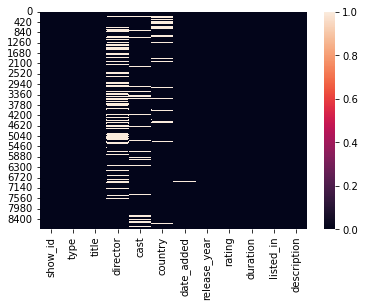

In [13]:
# 결측치 히트맵 그리기
sns.heatmap(netflix.isnull())

## 중복값 확인

In [14]:
# 중복값이 있는지 확인한다.
netflix.duplicated().sum()

0

- 중복값 없음

## 각 시리즈 별 데이터 수 확인

`장르`, `감독`, `배우`별 작품 수를 구하려니 조금 난감했던 것이, 여러 장르, 여러명의 감독, 배우가 겹쳐져 있어서 각 개별 요소로 떼어내는 작업이 필요했다.❗❗

그냥 `value_counts()`를 사용하는 것으로는 추출되지 않았음

- **`장르`별 작품 수**

In [15]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = netflix['listed_in'].dropna()
listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [16]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

42

In [17]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(netflix.index[netflix['listed_in'].notnull()][netflix['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [18]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

- **Movies**와 **Dramas** 장르가 가장 많은 비중을 차지 했다.
- **International Movies**와 **TV shows**, **International TV shows**가 각각 **3, 5, 6위**를 차지했고, 흥미로운 점은 **Comedies**가 **4위**를 기록했다는 것이다.
- 물론 드라마, 영화의 세부 장르 중 하나일 것으로 예상되지만, **2,000편**이 넘는 작품 수와 순위가 의외라고 느껴졌다.

- **`감독`별 작품 수**

In [19]:
director = netflix['director'].dropna().value_counts()
director

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [20]:
px.histogram(director, x = director.index[:30], y = director[:30], color = director[:30].index)

- **`배우`별 작품 수**

In [21]:
# 엠마 스톤이 출연한 작품 수 구하기
len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains("Emma Stone")])

8

- 위의 내용을 함수로 만들어준다.

In [22]:
# 결측치가 제거된 cast 시리즈를 cast 변수에 저장한다.
cast = netflix['cast'].dropna()
cast

1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 7982, dtype: object

In [23]:
actor = []

# cast 시리즈에서 여러명의 배우가 겹쳐져 있는 데이터를 한명 씩 분리하여 actor 리스트에 넣어준다.
for idx, v in enumerate(cast):
    c = v.split(', ')
    actor.extend(c)

# 배우 별 고유 리스트를 만들어 준다.
actor = np.unique(actor)

# 총 배우 수 확인
len(actor)

36439

- 배우는 총 **36439명** 이다.

In [24]:
# 각 배우 별 출연 작품 수를 딕셔너리로 만들어 준다.
actor_dict = {a : len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains(pat = a)]) for a in actor}

# actor_dict를 데이터 프레임으로 만들어 준다.
actor_df = pd.DataFrame.from_dict(actor_dict, orient='index', columns = ['number'])

- 많은 작품에 나온 배우들은 오히려 유명하지 않은 배우가 많은 것 같아서, 가장 적은 작품에 출연한 배우들을 추려보았다.

In [25]:
# 배우들의 작품 수 별 출연 횟수
actor_count = pd.DataFrame(actor_df.value_counts())
actor_count

,0
number,
1,25213
2,5452
3,2325
4,1136
5,699
...,...
29,1
51,1
31,1


In [26]:
# 파이 그래프 그리기
fig = px.pie(actor_count, labels=actor_count.index, names=actor_count[0], values=actor_count[0], title='FILMS')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- `69.2%`나 되는 배우들이 한 작품에만 출연한 것을 알 수 있었다.
- 그래서 배우별 작품 수를 구하고 싶었으나, **2만 5천명**이 넘는 배우들이 한 작품에만 출연했기 때문에 **다작 배우 TOP 50**이런 주제로 그래프로 작성하는 것이 불가능 했다.

# 넷플릭스 주가 데이터와 연계

- **2002년**부터 **2021년** 까지의 주가 데이터 이다.
- 넷플릭스 데이터의 **`date_added`** 컬럼과 주가 변동과의 관계가 있는지 궁금했다.

**Data Description**

- `Date` : 날짜
- `Open` : 시가
- `High` : 상한가
- `Low` : 하한가
- `Close` : 종가
- `Adj Close` : 적용된 종가
- `Volume` : 일 거래량

In [27]:
path_5 = path + 'NFLX_stock_2002to2021.csv'
netflix_stock = pd.read_csv(path_5, encoding='latin1')
netflix_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [28]:
# 데이터 셋의 shape를 확인
netflix_stock.shape

(4874, 7)

In [29]:
# 주가 데이터의 컬럼명을 확인한다.
netflix_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [30]:
# Informations about the Dataset
netflix_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4874 non-null   object 
 1   Open       4874 non-null   float64
 2   High       4874 non-null   float64
 3   Low        4874 non-null   float64
 4   Close      4874 non-null   float64
 5   Adj Close  4874 non-null   float64
 6   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


- 결측치가 없는 데이터

In [31]:
# 데이터 셋 describe
netflix_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


## 중복값 확인

In [32]:
# 중복값이 있는지 확인한다.
netflix_stock.duplicated().sum()

0

- 중복값 없음

## 넷플릭스 주식 추이 시각화

In [33]:
netflix_stock['Date'] = pd.to_datetime(netflix_stock['Date'])
netflix_stock = netflix_stock.set_index('Date')
netflix_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'Volume of stock versus time')

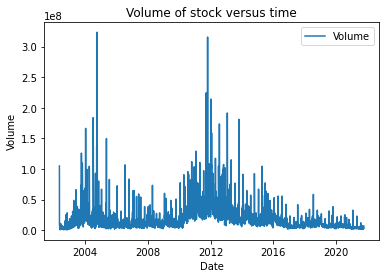

In [34]:
# 연도별 거래량 추이
sns.lineplot(x=netflix_stock.index,y=netflix_stock['Volume'],label='Volume')
plt.title('Volume of stock versus time')

- **2004년 ~ 2005년, 2012년**에 거래량이 엄청나게 늘었다.
- **2019년** 코로나 팬데믹 이후에 거래량이 늘었을 것으로 예상했는데, **2012년** 거래량 폭등이후 계속해서 감소 추세를 보이고 있다.

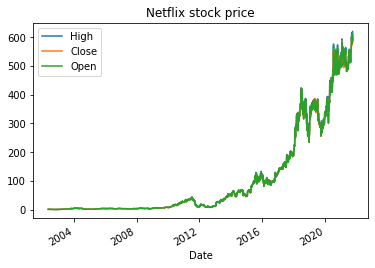

In [35]:
# 연도별 주가 추이
netflix_stock.plot(y=['High','Close','Open'],title='Netflix stock price')

- **2016년 이후**부터는 꾸준히 상승 곡선을 그리고 있다. 👉 거래량은 줄어들었지만 주가는 상승! 주가가 오르면서 새로 매수하려는 거래량이 줄어들지 않았을까, 예측할 수 있다. 매도도 줄어들 수 밖에 없는 것이, 계속해서 주가가 오르고 있기 때문에 더 높은 이윤을 기대할 수 있기 때문이라고 생각한다.
- 특히 **2019년 코로나 팬데믹 이후**는 가파르게 상승했는데, 모두가 아시다시피 이 때는 집콕 문화 중 하나로 넷플릭스가 자리매김하고 보편화 된 시점이다.

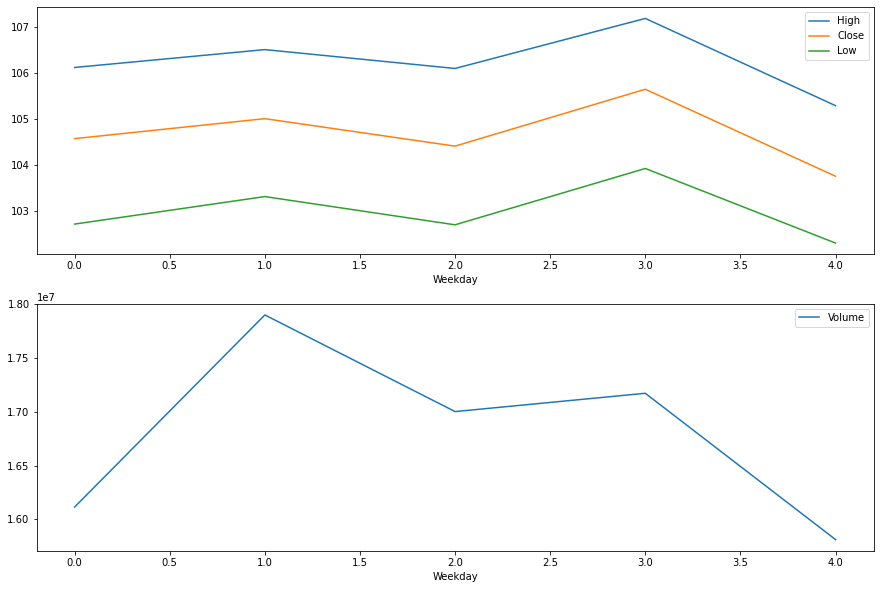

In [36]:
# 요일별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.day_of_week).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Weekday')
netflix_stock.groupby(netflix_stock.index.day_of_week).mean().plot(y='Volume',ax=ax2,xlabel='Weekday')

- 주식 거래는 평일에만 장이 열리므로, **월(0) ~ 금(4)** 데이터로 표시 된다.
- 근소한 차이기는 하지만, **목요일**에 살짝 주가가 오르는 추세를 보인다.
- 거래량은 **화요일**이 높은 것으로 나타난다.

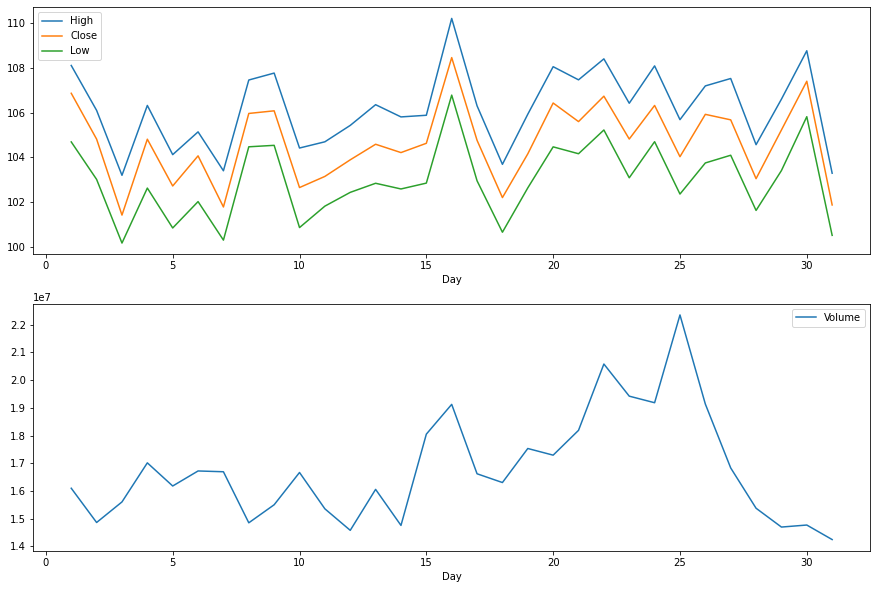

In [37]:
# 날짜별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.day).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Day')
netflix_stock.groupby(netflix_stock.index.day).mean().plot(y='Volume',ax=ax2,xlabel='Day')

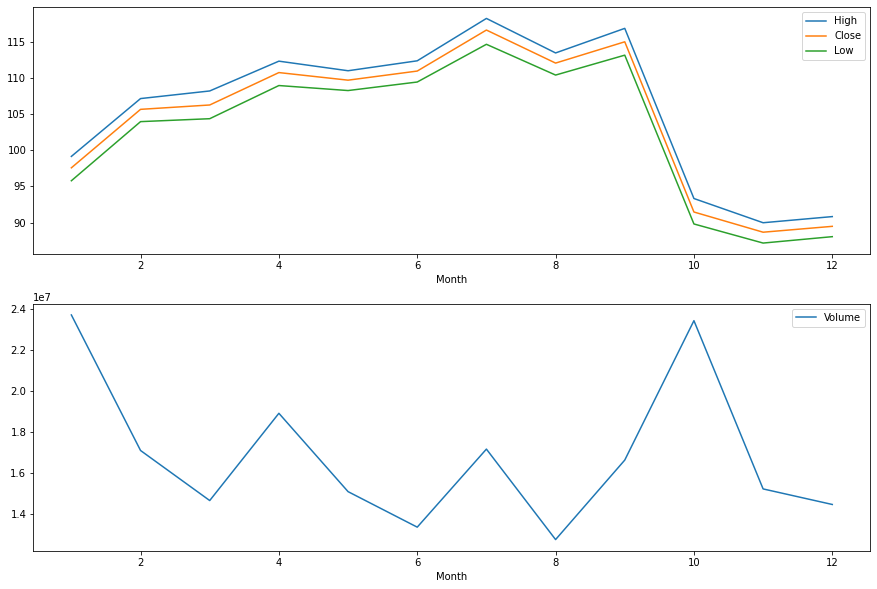

In [38]:
# 월별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.month).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Month')
netflix_stock.groupby(netflix_stock.index.month).mean().plot(y='Volume',ax=ax2,xlabel='Month')

- 매년 **9월~10월**에 **주가**가 눈에 띄게 하락하는 모양이 보인다.
- **거래량**은 반대로 **매년 9월~10월**에 거래량이 증가하는데, 이런 움직임은 주가가 하락하기 때문에 얼른 매도하려는 사람이 많아져서 그런 것이 아닐까 생각한다.

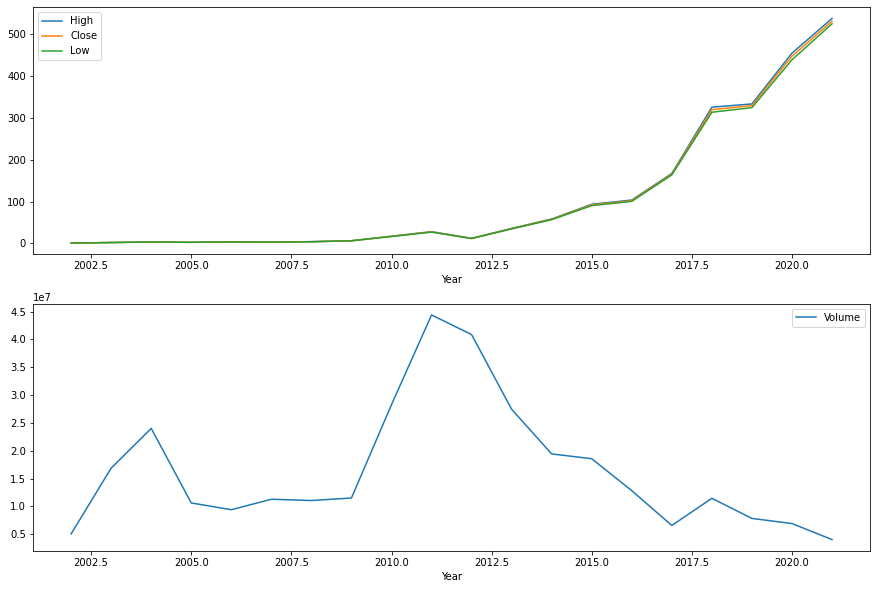

In [39]:
# 연도별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.year).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Year')
netflix_stock.groupby(netflix_stock.index.year).mean().plot(y='Volume',ax=ax2,xlabel='Year')

- **주가**는 점점 오르고 있지만, **거래량**은 2012년 이후 하락하고 있다.

## ✨연도별 주가 변동과 넷플릭스에 등록되는 작품 수의 상관관계분석

In [40]:
# date_added column을 datetime 자료형으로 변환
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

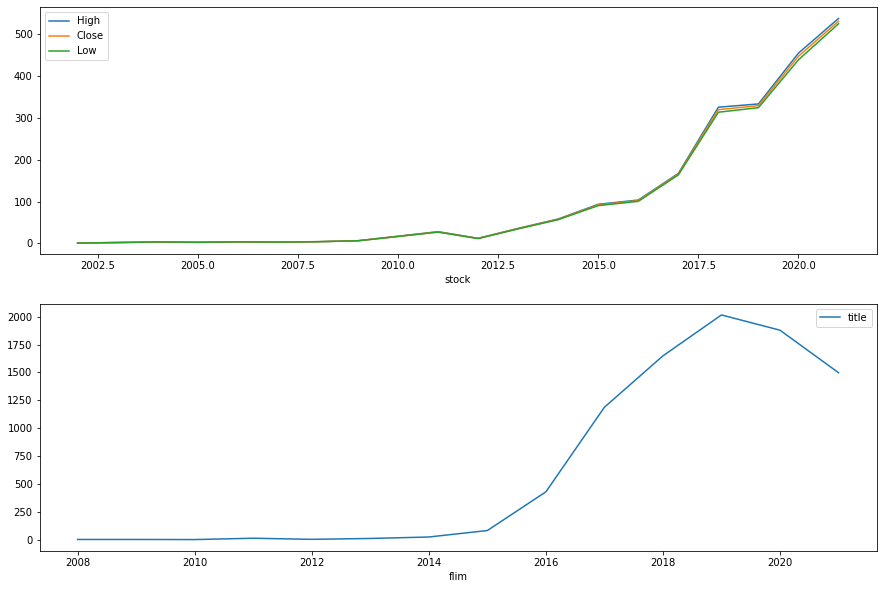

In [43]:
# 연도별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.year).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='stock')
netflix.groupby(netflix.index.year).count().plot(y='title',ax=ax2,xlabel='flim')

- **연도별 주가**와 **연도별 넷플릭스 등록 작품 수**가 어느 정도 비례하는 모양을 보인다.
- 특히 **2015년~2019년**은 넷플릭스가 본격적으로 성장하는 시기라고 볼 수 있다.
- **넷플릭스 작품 타이틀** 데이터 셋이 **2020년 9월**까지의 데이터라 작품수가 줄어든 것 처럼 보이긴 하지만, **12월 말**까지의 데이터가 있었더라면 등록 작품 수도 2019년보다 더 많을 것으로 예상된다.

# 디즈니 플러스 영화 분석

## 데이터 불러오기

**Data Description**

- `show_id` - Unique ID for every Movie/TV Show.
- `type` - Type of Content: Movie/TV Show.
- `title` - Name of the Movie/TV Show.
- `director` - Name of the Director of the Movie/TV Show.
- `cast` - Actors involved in the Movie/TV Show.
- `country` - Name of the Countries where the Movie/TV Show is produced.
- `date_added` - The Date in which the Movie/TV Show was added on Netflix.
- `release_year` - Original Release Year of the Movie/TV Show.
- `rating` - Rating of the Movie/TV Show.
- `duration` - Total Duration of the Movie (in Minutes) or TV Show (in Seasons).
- `listed_in` - Genre of the Movie/TV Show.
- `description` - Summary of the Movie/TV Show.

In [ ]:
path_6 = path + 'disney_plus_titles.csv'
desney = pd.read_csv(path_6, encoding='latin1')
desney

In [ ]:
# Checking Shape of Dataset
desney.shape

In [ ]:
# How many columns are present in the Dataset?
desney.columns

In [ ]:
# Informations about the Dataset
desney.info()

- `director`, `cast`, `country`, `date_add`, `rating` 컬럼에서 결측치가 있음
- 특히 `director`, `cast`, `country`에서 결측치가 많아 보임

In [ ]:
# 데이터 셋 describe
desney.describe()

- 유일한 숫자 데이터(**int64**)인 `release_year` 시리즈에 대해서만 `describe()`가 진행되었다.
- 평균이 `2003년`으로 나왔는데, 대략적으로 그 즈음 개봉한 디즈니 영화가 많은 것으로 해석된다. 👉 **뒤의 시각화에서 확인해 봅시다!**

## 결측치가 있는지 확인

In [ ]:
# 각 시리즈별 결측치 수 확인
desney.isnull().sum()

In [ ]:
# 결측치 히트맵 그리기
sns.heatmap(desney.isnull())

## 중복값 확인

In [ ]:
# 중복값이 있는지 확인한다.
desney.duplicated().sum()

- 중복값 없음

## 각 시리즈 별 데이터 수 확인

`장르`, `감독`, `배우`별 작품 수를 구하려니 조금 난감했던 것이, 여러 장르, 여러명의 감독, 배우가 겹쳐져 있어서 각 개별 요소로 떼어내는 작업이 필요했다.❗❗

그냥 `value_counts()`를 사용하는 것으로는 추출되지 않았음

- **`장르`별 작품 수**

In [ ]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = desney['listed_in'].dropna()
listed_in

In [ ]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

- 총 장르 수는 **44개**이다.

In [ ]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(desney.index[desney['listed_in'].notnull()][desney['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [ ]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

- 디즈니 영화 답게 **Family, Animation, Comedy, Action-Adventure**가 상위 4위로 랭크 되었다.
- **Animals & Nature, Coming of Age, Fantasy, Documentary**가 비슷한 비율로 다음 랭크를 차지하였다.

- **`감독`별 작품 수**

In [ ]:
director = desney['director'].dropna().value_counts()
director

In [ ]:
px.histogram(director, x = director.index[:30], y = director[:30], color = director[:30].index)

- **`배우`별 작품 수**

In [ ]:
# 겨울왕국 엘사 역의 Idina Menzel이 출연한 작품 수 구하기
len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains("Idina Menzel")])

- 위의 내용을 함수로 만들어준다.

In [ ]:
# 결측치가 제거된 cast 시리즈를 cast 변수에 저장한다.
cast = desney['cast'].dropna()
cast

In [ ]:
actor = []

# cast 시리즈에서 여러명의 배우가 겹쳐져 있는 데이터를 한명 씩 분리하여 actor 리스트에 넣어준다.
for idx, v in enumerate(cast):
    c = v.split(', ')
    actor.extend(c)

# 배우 별 고유 리스트를 만들어 준다.
actor = np.unique(actor)

# 총 배우 수 확인
len(actor)

- 배우는 총 **3,759명** 이다.
- 아마도 더빙 성우로 추정된다. (혹은 디즈니 영화의 특성 상 뮤지컬 배우가 있을 수 있다.)

In [ ]:
# 각 배우 별 출연 작품 수를 딕셔너리로 만들어 준다.
actor_dict = {a : len(desney.index[desney['cast'].notnull()][desney['cast'].dropna().str.contains(pat = a)]) for a in actor}

# actor_dict를 데이터 프레임으로 만들어 준다.
actor_df = pd.DataFrame.from_dict(actor_dict, orient='index', columns = ['number'])

In [ ]:
# 배우들의 작품 수 별 출연 횟수
actor_count = pd.DataFrame(actor_df.value_counts())
actor_count

In [ ]:
# 파이 그래프 그리기
fig = px.pie(actor_count, labels=actor_count.index, names=actor_count[0], values=actor_count[0], title='FILMS')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- `약 72.9%`의 배우들이 디즈니 영화에 한 번씩만 출연했다.
- 넷플릭스에서와 마찬가지로, 너무 많은 배우들이 있어서 배우 별 출연 작품 수를 구하지 못하고 출연한 작품 수를 기준으로 배우들의 수를 구해 보았다.